In [28]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns # a charting package
import matplotlib.pyplot as plt # the original Python chating package

transactions = pd.read_csv('datasets/transactions.csv')

transactions['created_at'] =  pd.to_datetime(transactions['created_at'])

transactions = transactions[transactions.created_at>'2021-09-01']
transactions = transactions[transactions.created_at<'2022-10-01']
display(transactions)
transactions.info()

In [19]:
# Define a function that will parse the date
def get_day(x): return dt.datetime(x.year, x.month, x.day) 

def get_month(x):
    return dt.datetime(x.year, x.month, 1)

# Create InvoiceDay column
transactions['InvoiceMonth'] = transactions['created_at'].apply(get_month) 

# Group by CustomerID and select the InvoiceDay value
grouping = transactions.groupby('user_id')['InvoiceMonth'] 

# Assign a minimum InvoiceDay value to the dataset
transactions['CohortMonth'] = grouping.transform('min')

# View the top 5 rows
display(transactions)

,id,user_id,price,created_at,product_id,role_id,InvoiceMonth,CohortMonth,CohortIndex
932,1800,50593,20.00,2021-09-01 02:22:00,NaN,2.0,2021-09-01,2021-09-01,1
933,1801,50593,5.00,2021-09-01 02:23:00,NaN,2.0,2021-09-01,2021-09-01,1
934,1810,60345,10.00,2021-09-01 19:38:00,NaN,2.0,2021-09-01,2021-09-01,1
935,1811,60157,20.00,2021-09-01 20:57:00,NaN,2.0,2021-09-01,2021-09-01,1
936,1812,60157,20.00,2021-09-01 20:59:00,NaN,2.0,2021-09-01,2021-09-01,1
...,...,...,...,...,...,...,...,...,...
10500,17388,166486,20.00,2022-09-30 19:35:00,NaN,2.0,2022-09-01,2022-09-01,1
10501,17389,166486,20.00,2022-09-30 19:35:00,NaN,2.0,2022-09-01,2022-09-01,1
10502,17390,188314,8.00,2022-09-30 20:50:00,NaN,2.0,2022-09-01,2022-09-01,1
10503,17391,188551,9.99,2022-09-30 22:34:00,7.0,1.0,2022-09-01,2022-09-01,1


In [11]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [12]:
# Get the integers for date parts from the InvoiceDaycolumn
invoice_year, invoice_month, invoice_day = get_date_int(transactions, 'InvoiceMonth')

# Get the integers for date parts from the CohortDay column
cohort_year, cohort_month, cohort_day = get_date_int(transactions, 'CohortMonth')

In [21]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Calculate difference in days
days_diff = invoice_day - cohort_day

# Extract the difference in days from all previous values
transactions['CohortIndex'] = years_diff * 12 + months_diff + 1
display(transactions.head())

,id,user_id,price,created_at,product_id,role_id,InvoiceMonth,CohortMonth,CohortIndex
932,1800,50593,20.0,2021-09-01 02:22:00,NaN,2.0,2021-09-01,2021-09-01,1
933,1801,50593,5.0,2021-09-01 02:23:00,NaN,2.0,2021-09-01,2021-09-01,1
934,1810,60345,10.0,2021-09-01 19:38:00,NaN,2.0,2021-09-01,2021-09-01,1
935,1811,60157,20.0,2021-09-01 20:57:00,NaN,2.0,2021-09-01,2021-09-01,1
936,1812,60157,20.0,2021-09-01 20:59:00,NaN,2.0,2021-09-01,2021-09-01,1


In [14]:
display(transactions['CohortIndex'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64)

In [23]:
cohort_data = transactions.groupby(['CohortMonth', 'CohortIndex'])['user_id'].apply(pd.Series.nunique).reset_index()
display(cohort_data)

,CohortMonth,CohortIndex,user_id
0,2021-09-01,1,111
1,2021-09-01,2,13
2,2021-09-01,3,4
3,2021-09-01,4,6
4,2021-09-01,5,4
...,...,...,...
86,2022-07-01,2,31
87,2022-07-01,3,15
88,2022-08-01,1,369
89,2022-08-01,2,36


In [24]:
cohort_count = cohort_data.pivot_table(index = 'CohortMonth',columns = 'CohortIndex',values = 'user_id')
display(cohort_count)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2021-09-01,111.0,13.0,4.0,6.0,4.0,6.0,4.0,3.0,4.0,3.0,4.0,1.0,2.0
2021-10-01,103.0,9.0,5.0,4.0,1.0,5.0,1.0,3.0,4.0,1.0,1.0,2.0,NaN
2021-11-01,101.0,8.0,5.0,5.0,4.0,3.0,4.0,2.0,1.0,1.0,5.0,NaN,NaN
2021-12-01,184.0,20.0,9.0,14.0,10.0,8.0,11.0,7.0,9.0,10.0,NaN,NaN,NaN
2022-01-01,296.0,20.0,24.0,24.0,14.0,8.0,9.0,9.0,6.0,NaN,NaN,NaN,NaN
2022-02-01,267.0,16.0,15.0,10.0,7.0,4.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN
2022-03-01,287.0,18.0,18.0,22.0,13.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-01,295.0,22.0,14.0,16.0,11.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01,258.0,16.0,8.0,12.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
cohort_size = cohort_count.iloc[:,0] #select all the rows : select the first column
retention = cohort_count.divide(cohort_size, axis=0) #Divide the cohort by the first column
retention.round(3)*100 # round the retention to 3 places

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2021-09-01,100.0,11.7,3.6,5.4,3.6,5.4,3.6,2.7,3.6,2.7,3.6,0.9,1.8
2021-10-01,100.0,8.7,4.9,3.9,1.0,4.9,1.0,2.9,3.9,1.0,1.0,1.9,NaN
2021-11-01,100.0,7.9,5.0,5.0,4.0,3.0,4.0,2.0,1.0,1.0,5.0,NaN,NaN
2021-12-01,100.0,10.9,4.9,7.6,5.4,4.3,6.0,3.8,4.9,5.4,NaN,NaN,NaN
2022-01-01,100.0,6.8,8.1,8.1,4.7,2.7,3.0,3.0,2.0,NaN,NaN,NaN,NaN
2022-02-01,100.0,6.0,5.6,3.7,2.6,1.5,3.7,1.1,NaN,NaN,NaN,NaN,NaN
2022-03-01,100.0,6.3,6.3,7.7,4.5,4.2,4.2,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-01,100.0,7.5,4.7,5.4,3.7,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01,100.0,6.2,3.1,4.7,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


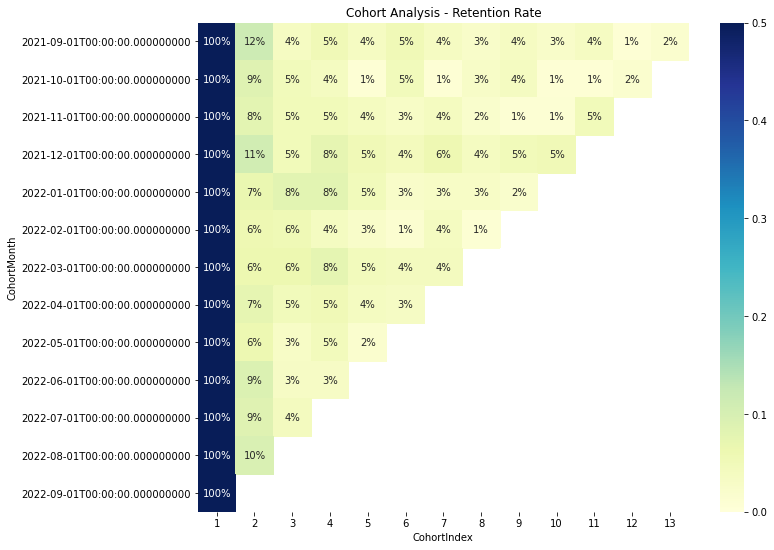

In [29]:
plt.figure(figsize = (11,9))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(data = retention, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.5,
            cmap = "YlGnBu")
plt.show()